In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

import os

In [ ]:
candy_data = pd.read_csv("/content/candy-data.csv")

In [ ]:
candy_data.head(2)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936


In [ ]:
candy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [ ]:
candy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


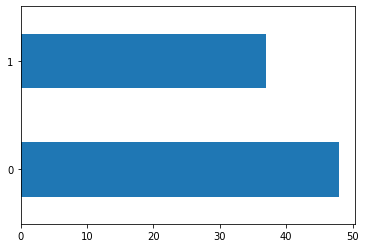

In [ ]:
# Давайте посмотрим 0, 1 количество шоколада в виде батончика
candy_data['chocolate'].value_counts().plot.barh();

In [ ]:
# функция "competitorname" нам не нужна, ее отбросим
candy_data.drop("competitorname", inplace = True, axis=1)

y = candy_data.chocolate.values
X = candy_data.drop(["chocolate"], axis = 1)

In [ ]:
# посмотрим, сколько нулевых значений у нас есть, мб нам не нужно нормализовать

candy_data.isnull().sum()

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

#Логистическая регрессия

In [ ]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
loj_model.intercept_      # константа
loj_model.coef_           # независимые

array([[-2.52858047, -0.19697876,  0.03940308, -0.16539952,  0.49783674,
        -0.47591613,  0.81511886, -0.59971553, -0.2581028 ,  0.3224988 ,
         0.05387906]])

In [ ]:
y_pred = loj_model.predict(X)        # прогноз
confusion_matrix(y, y_pred)          # матрица неточностей

array([[45,  3],
       [ 2, 35]])

In [ ]:
accuracy_score(y, y_pred)

0.9411764705882353

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.92      0.95      0.93        37

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



In [ ]:
# модель прогзноща
loj_model.predict(X)[0:20]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.04188007, 0.95811993],
       [0.06796361, 0.93203639],
       [0.47747468, 0.52252532],
       [0.27606479, 0.72393521],
       [0.8115512 , 0.1884488 ],
       [0.11795563, 0.88204437],
       [0.12265733, 0.87734267],
       [0.710369  , 0.289631  ],
       [0.58985234, 0.41014766],
       [0.93082723, 0.06917277]])

In [ ]:
# Теперь давайте попробуем смоделировать вероятность "predict_proba" 

y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:20]

array([0.95811993, 0.93203639, 0.52252532, 0.72393521, 0.1884488 ,
       0.88204437, 0.87734267, 0.289631  , 0.41014766, 0.06917277,
       0.74572776, 0.05242911, 0.03240256, 0.07192718, 0.06071258,
       0.07508196, 0.06537882, 0.05447884, 0.15402182, 0.39845081])

In [ ]:
# giving limit for values

y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [ ]:
# и сравним с вышеизложенным, мы сможем увидеть что произошло
y_pred[0:20]

[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
confusion_matrix(y, y_pred)

array([[45,  3],
       [ 2, 35]])

In [ ]:
accuracy_score(y, y_pred)

0.9411764705882353

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.92      0.95      0.93        37

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



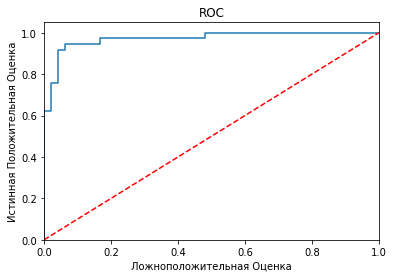

In [ ]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная Оценка')
plt.ylabel('Истинная Положительная Оценка')
plt.title('ROC')
plt.show()

# blue line: который мы задаем нашей моделью
# red line: если мы этого не сделаем, что может быть в результате

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [ ]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(y_test, loj_model.predict(X_test))

1.0

In [ ]:
# с кросс-валидацией

cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

1.0

#Наивный байессовский 

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_model.predict(X_test)[0:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
nb_model.predict_proba(X_test)[0:10]

array([[1.00000000e+00, 8.16166501e-11],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999997e-01, 2.82736615e-09],
       [9.99975666e-01, 2.43341023e-05],
       [1.00000000e+00, 1.02464777e-11],
       [1.00000000e+00, 7.27061697e-11],
       [1.28992370e-10, 1.00000000e+00],
       [9.99999998e-01, 1.51628998e-09],
       [9.99999997e-01, 2.62343656e-09],
       [1.00000000e+00, 2.45546990e-10]])

In [ ]:
# predict
y_pred = nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8846153846153846

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

1.0